# **1. Eksplorasi Data**

In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve

## **1.1 Memuat Data**

In [186]:
# URL dari dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv'
data = pd.read_csv(url)


## **1.2 Memeriksa Informasi Awal Data**

In [187]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

## **1.3 Memeriksa Nilai Yang Hilang**

In [188]:
print("Missing values in each column:\n", data.isnull().sum())

Missing values in each column:
 UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


## **1.4 Menghapus Duplikasi**

In [189]:
data.drop_duplicates(inplace=True)

## **1.5 Informasi Statistik Deskriptif Data**

In [190]:
print("Summary statistics:\n", data.describe())

Summary statistics:
                UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.80000

## **1.6 Mendistribusikan Nilai pada kolom "Type"**

In [191]:
print("Value counts for 'Type':\n", data['Type'].value_counts())

Value counts for 'Type':
 Type
L    6000
M    2997
H    1003
Name: count, dtype: int64


/tmp/ipykernel_5480/1644464628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')


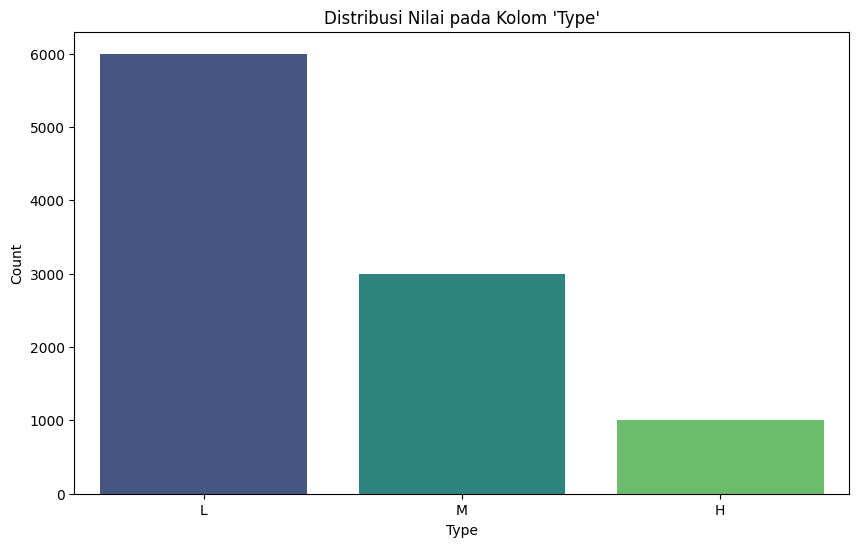

In [192]:
type_counts = data['Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='viridis')
plt.title("Distribusi Nilai pada Kolom 'Type'")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

## **1.7 Mendistribusikan Kegagalan Mesin Berdasarkan Type**

In [193]:
failure_counts = data.groupby(['Type', 'Machine failure']).size().reset_index(name='count')
print(failure_counts)

  Type  Machine failure  count
0    H                0    982
1    H                1     21
2    L                0   5765
3    L                1    235
4    M                0   2914
5    M                1     83


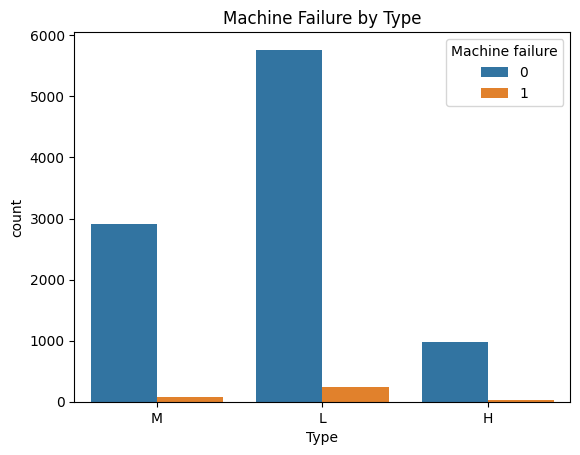

In [194]:
sns.countplot(x='Type', hue='Machine failure', data=data)
plt.title("Machine Failure by Type")
plt.show()

# **2. Persiapan Data untuk Model**

## **2.1 Pemisah Fitur dan Target**

In [195]:
X = data.drop(['UDI', 'Product ID', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)
y = data['Machine failure']

## **2.2 Preprocessing dan Pembentukan Model (Decision Tree & Logistic Regression)**

In [196]:
numeric_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
categorical_features = ['Type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

lr_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

## **2.3 Pemisahan Data untuk Pelatihan dan Pengujian**

In [197]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## **2.4 Pelatihan Model Decision Tree**

In [198]:
dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Type'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

## **2.5 Pelatihan Model Logistic Regression**

In [199]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Air temperature [K]',
                                                   'Process temperature [K]',
                                                   'Rotational speed [rpm]',
                                                   'Torque [Nm]',
                                                   'Tool wear [min]']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Type'])])),
                ('classifier',
                 LogisticRegression(max_iter=1000, random_state=42))])

# **3. Hasil dan Evaluasi**

## **3.1 Fungsi Evaluasi Model**

In [200]:
def evaluate_model(model, X_val, y_val, X_test, y_test):
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print("Validation Set Classification Report:\n", classification_report(y_val, y_val_pred))
    print("Validation Set Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
    val_roc_auc = roc_auc_score(y_val, y_val_proba)
    print(f'\nValidation ROC-AUC score: {val_roc_auc} \n')

    print("Test Set Classification Report:\n", classification_report(y_test, y_test_pred))
    print("Test Set Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    test_roc_auc = roc_auc_score(y_test, y_test_proba)
    print(f'\nTest ROC-AUC score: {test_roc_auc} \n')

    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f'Cross-validation scores: {cv_scores}')
    print(f'Mean cross-validation score: {cv_scores.mean()}')

## **3.2 Evaluasi Model Tanpa Tuning**

### **a. Model Decision Tree**

In [201]:
print("Evaluasi model Decision Tree tanpa tuning:")
evaluate_model(dt_model, X_val, y_val, X_test, y_test)

Evaluasi model Decision Tree tanpa tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      1939
           1       0.58      0.72      0.64        61

    accuracy                           0.98      2000
   macro avg       0.79      0.85      0.81      2000
weighted avg       0.98      0.98      0.98      2000

Validation Set Confusion Matrix:
 [[1907   32]
 [  17   44]]

Validation ROC-AUC score: 0.8524040615832058 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.68      0.79      0.73        68

    accuracy                           0.98      2000
   macro avg       0.84      0.89      0.86      2000
weighted avg       0.98      0.98      0.98      2000

Test Set Confusion Matrix:
 [[1907   25]
 [  14   54]]

Test ROC-AUC score: 0.8905888442333455 

Cross-validation scores: 

### **b. Model Logistic Regression**

In [202]:
print("Evaluasi model Logistic Regression tanpa tuning:")
evaluate_model(lr_model, X_val, y_val, X_test, y_test)

Evaluasi model Logistic Regression tanpa tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.72      0.34      0.47        61

    accuracy                           0.98      2000
   macro avg       0.85      0.67      0.73      2000
weighted avg       0.97      0.98      0.97      2000

Validation Set Confusion Matrix:
 [[1931    8]
 [  40   21]]

Validation ROC-AUC score: 0.9082339214907126 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.91      0.15      0.25        68

    accuracy                           0.97      2000
   macro avg       0.94      0.57      0.62      2000
weighted avg       0.97      0.97      0.96      2000

Test Set Confusion Matrix:
 [[1931    1]
 [  58   10]]

Test ROC-AUC score: 0.9104783217634881 

Cross-validation sc

# **4. Tuning Model**

In [203]:
param_grid_dt = {
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

param_grid_lr = {
    'classifier__C': [0.1, 1.0, 10],
    'classifier__penalty': ['l2']
}

grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy')
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)

print(f'Best parameters for Decision Tree: {grid_search_dt.best_params_}')
print(f'Best parameters for Logistic Regression: {grid_search_lr.best_params_}')

best_dt_model = grid_search_dt.best_estimator_
best_lr_model = grid_search_lr.best_estimator_

Best parameters for Decision Tree: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10}
Best parameters for Logistic Regression: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}


## **4.1 Evaluasi Model dengan Tuning**

### **a. Model Decision Tree**

In [204]:
print("Evaluasi model Decision Tree dengan tuning:")
evaluate_model(best_dt_model, X_val, y_val, X_test, y_test)

Evaluasi model Decision Tree dengan tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1939
           1       0.63      0.61      0.62        61

    accuracy                           0.98      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.98      0.98      0.98      2000

Validation Set Confusion Matrix:
 [[1917   22]
 [  24   37]]

Validation ROC-AUC score: 0.8678463632597502 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1932
           1       0.80      0.75      0.77        68

    accuracy                           0.98      2000
   macro avg       0.89      0.87      0.88      2000
weighted avg       0.98      0.98      0.98      2000

Test Set Confusion Matrix:
 [[1919   13]
 [  17   51]]

Test ROC-AUC score: 0.8992319753988552 

Cross-validation scores:

### **b. Model Logistic Regression**

In [205]:
print("Evaluasi model Logistic Regression dengan tuning:")
evaluate_model(best_lr_model, X_val, y_val, X_test, y_test)

Evaluasi model Logistic Regression dengan tuning:
Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.94      0.26      0.41        61

    accuracy                           0.98      2000
   macro avg       0.96      0.63      0.70      2000
weighted avg       0.98      0.98      0.97      2000

Validation Set Confusion Matrix:
 [[1938    1]
 [  45   16]]

Validation ROC-AUC score: 0.9066613684593208 

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1932
           1       0.86      0.09      0.16        68

    accuracy                           0.97      2000
   macro avg       0.91      0.54      0.57      2000
weighted avg       0.97      0.97      0.96      2000

Test Set Confusion Matrix:
 [[1931    1]
 [  62    6]]

Test ROC-AUC score: 0.9099683351601511 

Cross-validation s

# **5. Visualisasi Hasil Model**

## **5.1 ROC Curve**


ROC Curve for each model:


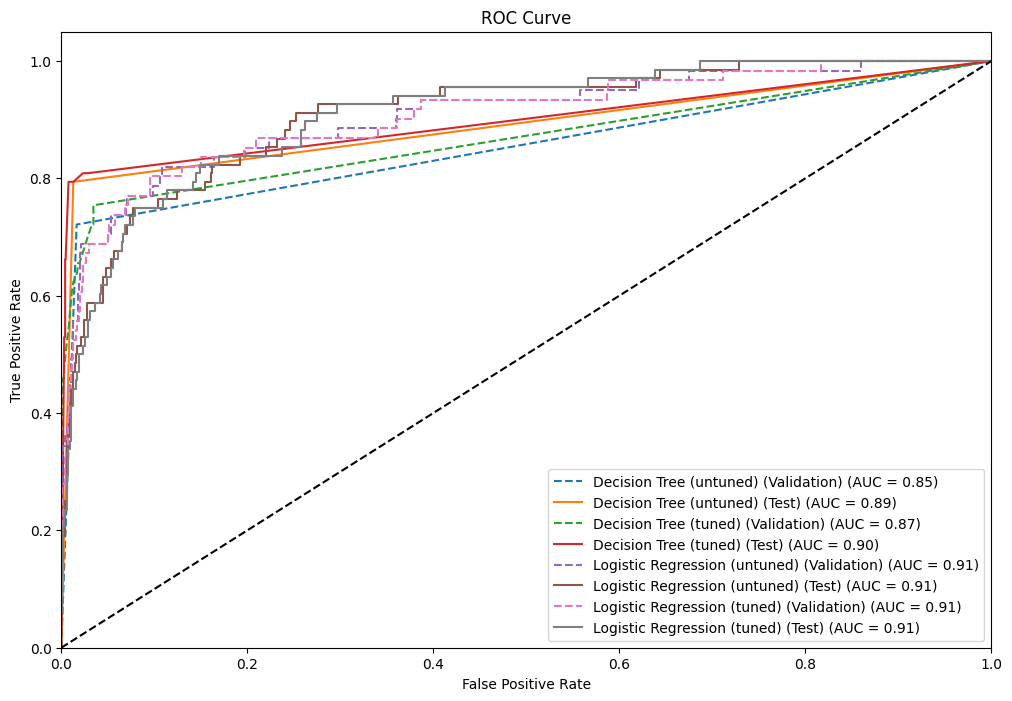

In [206]:
def plot_roc_curve(models, X_val, y_val, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_val_proba = model.predict_proba(X_val)[:, 1]
        fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
        roc_auc_val = auc(fpr_val, tpr_val)

        y_test_proba = model.predict_proba(X_test)[:, 1]
        fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
        roc_auc_test = auc(fpr_test, tpr_test)

        plt.plot(fpr_val, tpr_val, linestyle='--', label=f'{name} (Validation) (AUC = {roc_auc_val:.2f})')
        plt.plot(fpr_test, tpr_test, label=f'{name} (Test) (AUC = {roc_auc_test:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

models = {
    'Decision Tree (untuned)': dt_model,
    'Decision Tree (tuned)': best_dt_model,
    'Logistic Regression (untuned)': lr_model,
    'Logistic Regression (tuned)': best_lr_model
}

print("\nROC Curve for each model:")
plot_roc_curve(models, X_val, y_val, X_test, y_test)

## **5.2 Precision-Recall Curve**


Precision-Recall Curve for each model:


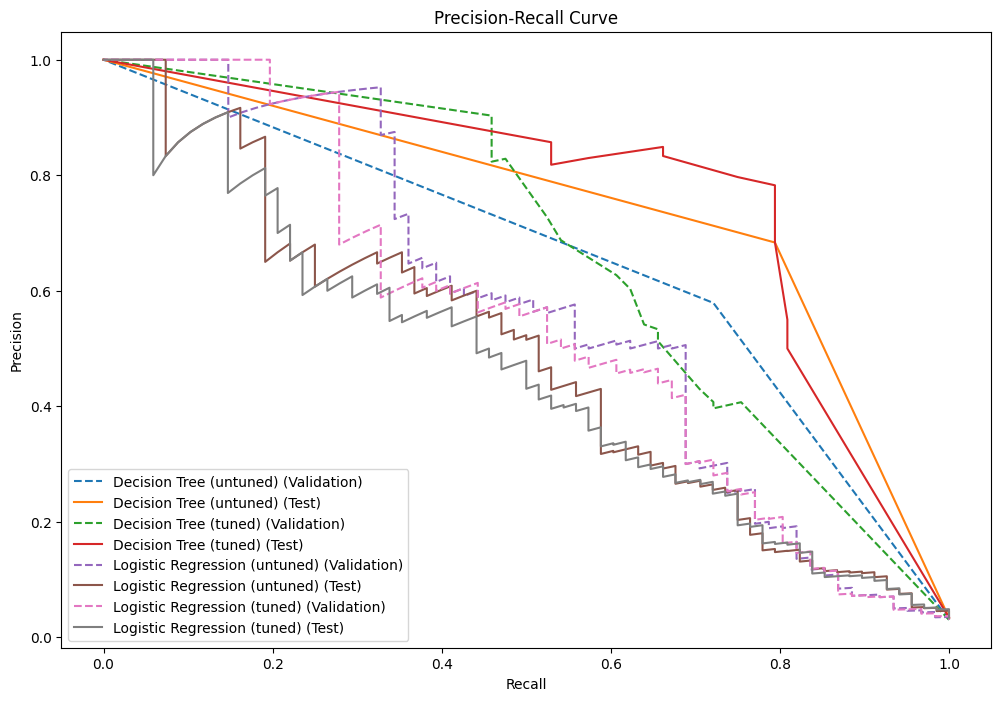

In [207]:
def plot_precision_recall_curve(models, X_val, y_val, X_test, y_test):
    plt.figure(figsize=(12, 8))

    for name, model in models.items():
        y_val_proba = model.predict_proba(X_val)[:, 1]
        precision_val, recall_val, _ = precision_recall_curve(y_val, y_val_proba)

        y_test_proba = model.predict_proba(X_test)[:, 1]
        precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_proba)

        plt.plot(recall_val, precision_val, linestyle='--', label=f'{name} (Validation)')
        plt.plot(recall_test, precision_test, label=f'{name} (Test)')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.show()

print("\nPrecision-Recall Curve for each model:")
plot_precision_recall_curve(models, X_val, y_val, X_test, y_test)

# **6. Hasil Analisis dan Kesimpulan**

## **6.1 Hasil Analisis Tanpa Tuning**

### **a. Model Decision Tree**

Validation Set:

Precision:
- Kelas 0: 0.99
- Kelas 1: 0.58

Recall:
- Kelas 0: 0.98
- Kelas 1: 0.72
- Akurasi: 0.98
- Macro average F1-score: 0.81
- Weighted average F1-score: 0.98
- ROC-AUC: 0.8524

Confusion Matrix:
- Kelas 0: [1907 benar, 32 salah]
- Kelas 1: [17 benar, 44 salah]

Test Set:

Precision:
- Kelas 0: 0.99
- Kelas 1: 0.68
    
Recall:
- Kelas 0: 0.99
- Kelas 1: 0.79
- Akurasi: 0.98
- Macro average F1-score: 0.86
- Weighted average F1-score: 0.98
- ROC-AUC: 0.8906

Confusion Matrix:
- Kelas 0: [1921 benar, 11 salah]
- Kelas 1: [14 benar, 54 salah]

Cross-validation:
- Skor: [0.966, 0.9665, 0.532, 0.958, 0.9815]
- Rata-rata: 0.8808

### **b. Model Logistic Regression**

Validation Set:

Precision:
- Kelas 0: 0.98
- Kelas 1: 0.72

Recall:
- Kelas 0: 1.00
- Kelas 1: 0.34
- Akurasi: 0.98
- Macro average F1-score: 0.73
- Weighted average F1-score: 0.97
- ROC-AUC: 0.9082

Confusion Matrix:
- Kelas 0: [1931 benar, 8 salah]
- Kelas 1: [40 benar, 21 salah]

Test Set:

Precision:
- Kelas 0: 0.97
- Kelas 1: 0.91

Recall:
- Kelas 0: 1.00
- Kelas 1: 0.15
- Akurasi: 0.97
- Macro average F1-score: 0.62
- Weighted average F1-score: 0.97
- ROC-AUC: 0.9105

Confusion Matrix:
- Kelas 0: [1932 benar, 0 salah]
- Kelas 1: [58 benar, 10 salah]

Cross-validation:
- Skor: [0.969, 0.9685, 0.9575, 0.9725, 0.968]
- Rata-rata: 0.9671

## **6.2 Hasil Analisis Dengan Tuning**

### **a. Model Decision Tree**

Validation Set:

Precision:
- Kelas 0: 0.99
- Kelas 1: 0.63
    
Recall:
- Kelas 0: 0.99
- Kelas 1: 0.61
- Akurasi: 0.98
- Macro average F1-score: 0.80
- Weighted average F1-score: 0.98
- ROC-AUC: 0.8678

Confusion Matrix:
- Kelas 0: [1917 benar, 22 salah]
- Kelas 1: [24 benar, 37 salah]

Test Set:

Precision:
- Kelas 0: 0.99
- Kelas 1: 0.80

Recall:
- Kelas 0: 0.99
- Kelas 1: 0.75
- Akurasi: 0.98
- Macro average F1-score: 0.88
- Weighted average F1-score: 0.98
- ROC-AUC: 0.8992

Confusion Matrix:
- Kelas 0: [1921 benar, 11 salah]
- Kelas 1: [17 benar, 51 salah]

Cross-validation:
- Skor: [0.964, 0.973, 0.5385, 0.9535, 0.983]
- Rata-rata: 0.8824

### **b. Model Logistic Regression**

Validation Set:

Precision:
- Kelas 0: 0.98
- Kelas 1: 0.94
    
Recall:
- Kelas 0: 1.00
- Kelas 1: 0.26
- Akurasi: 0.98
- Macro average F1-score: 0.70
- Weighted average F1-score: 0.97
- ROC-AUC: 0.9066

Confusion Matrix:
- Kelas 0: [1938 benar, 1 salah]
- Kelas 1: [45 benar, 16 salah]

Test Set:
    
Precision:
- Kelas 0: 0.97
- Kelas 1: 0.86
    
Recall:
- Kelas 0: 1.00
- Kelas 1: 0.09
- Akurasi: 0.97
- Macro average F1-score: 0.57
- Weighted average F1-score: 0.97
- ROC-AUC: 0.9099

Confusion Matrix:
- Kelas 0: [1932 benar, 0 salah]
- Kelas 1: [62 benar, 6 salah]

Cross-validation:
- Skor: [0.968, 0.97, 0.96, 0.9725, 0.968]
- Rata-rata: 0.9677

## **6.3 Kesimpulan**

Decision Tree Tanpa Tuning:
- Akurasi tinggi tetapi performa rendah dalam memprediksi kelas minoritas.
- Variabilitas cross-validation tinggi, menunjukkan ketidakstabilan model.

Logistic Regression Tanpa Tuning:
- Lebih seimbang dalam memprediksi kedua kelas, namun recall untuk kelas minoritas masih rendah.
- Variabilitas cross-validation lebih rendah dan performa lebih konsisten dibandingkan Decision Tree.

Decision Tree Dengan Tuning:
- Peningkatan dalam recall kelas minoritas, tetapi masih ada ketidakstabilan dalam cross-validation.
- Akurasi dan ROC-AUC meningkat, menunjukkan performa yang lebih baik setelah tuning.

Logistic Regression Dengan Tuning:
- Peningkatan dalam precision untuk kelas minoritas, tetapi recall masih rendah.
- Variabilitas cross-validation tetap rendah, menunjukkan model yang lebih stabil setelah tuning.

# **7. Rekomendasi**

- Logistic Regression tanpa tuning memiliki performa terbaik secara keseluruhan dengan cross-validation yang konsisten dan akurasi yang tinggi.
- Jika recall untuk kelas minoritas lebih penting, Decision Tree dengan tuning dapat dipertimbangkan karena menunjukkan peningkatan recall setelah tuning.
- Untuk model yang lebih stabil dengan performa yang seimbang, Logistic Regression dengan tuning adalah pilihan terbaik.